<a href="https://colab.research.google.com/github/sefat22/Micro-Credential-22/blob/main/Advertising_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Identify the problem 

#In this notebook I will conduct an analysis to classify who clicked on the advertisement something based on Daily internet usage, age and area income. 

#Task 2: Load the libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Task 3: Load the data

In [3]:
dataset = pd.read_csv ('https://raw.githubusercontent.com/sefat22/Micro-Credential-22/main/advertising.csv')

#Task 4: EDA (Exploratory Data Analysis)

In [4]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
dataset.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
dataset.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [8]:
dataset.isnull().value_counts()

Daily Time Spent on Site  Age    Area Income  Daily Internet Usage  Ad Topic Line  City   Male   Country  Timestamp  Clicked on Ad
False                     False  False        False                 False          False  False  False    False      False            1000
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


#Task 5: Data Visualization

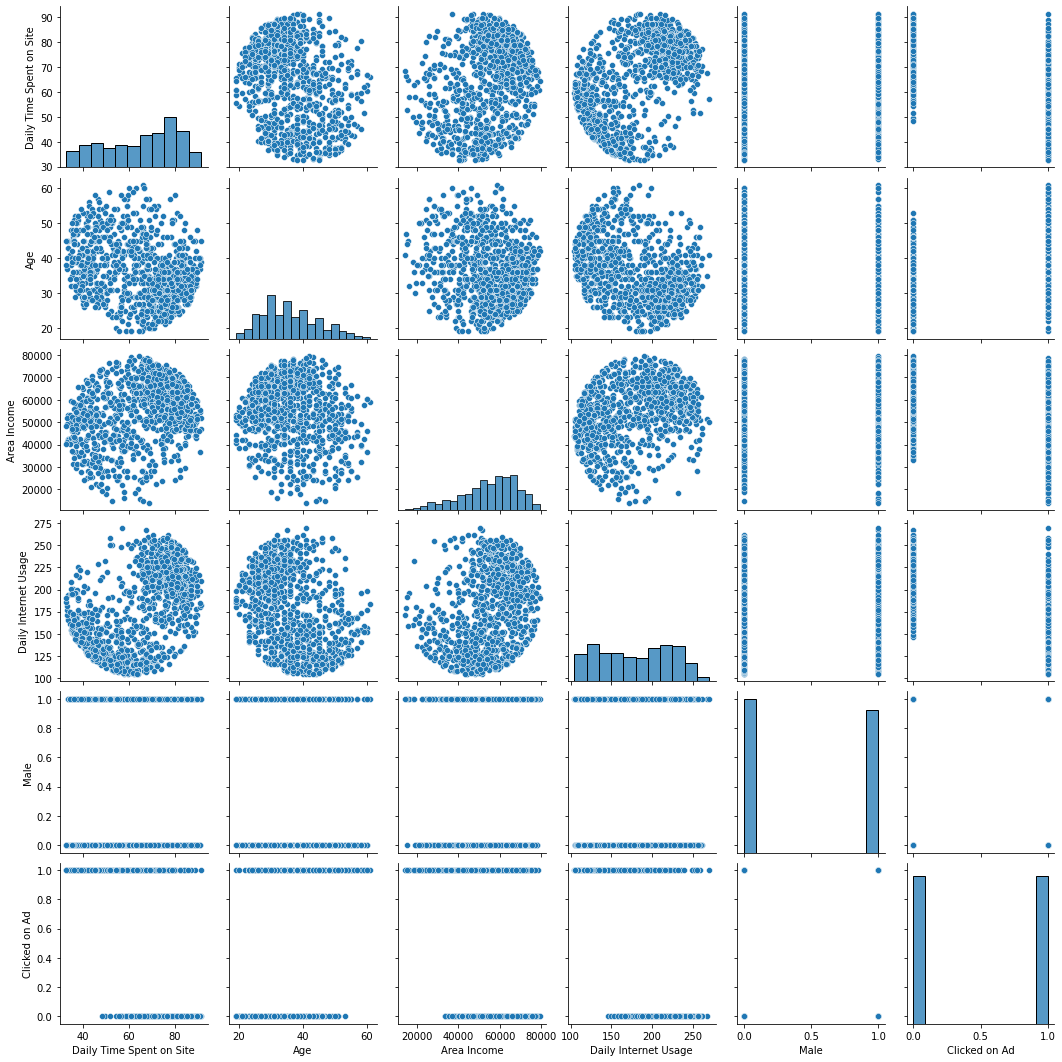

In [26]:
sns.pairplot(dataset)

#Task 6: Train, Test Split 

In [14]:
from sklearn.model_selection import train_test_split

In [60]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Task 7 : Feature Scaling  

In [62]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [63]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Task 8: Conduct Logistic Regression 

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
classifier = LogisticRegression(random_state = 0)

In [66]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [67]:
predictions = classifier.predict(X_test)

#Task 9: Making Predictions 

In [29]:
y_pred = classifier.predict(X_test)

In [68]:
print('The prediction Accuracy of the model is ', classifier.score(X_test, y_test))
pp = classifier.predict(X_test)
print("Clicked on the Advertisement", sum(pp!=0))
print("Did not click on the Advertisement", sum(pp == 0))

The prediction Accuracy of the model is  0.912
Clicked on the Advertisement 122
Did not click on the Advertisement 128


#Task 10: Evaluating the model 

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       136
           1       0.88      0.94      0.91       114

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



###Making a Confusion Matrix 

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[121  15]
 [  7 107]]


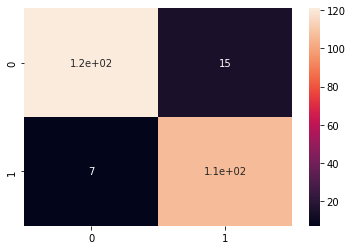

In [36]:
sns.heatmap(cm, annot = True)

###Visualizing the training set results 

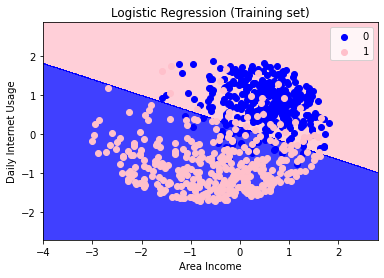

In [74]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('Pink', 'Blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('Blue', 'Pink'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Area Income')
plt.ylabel('Daily Internet Usage')
plt.legend()
plt.show();

###Visualizing the Test set result

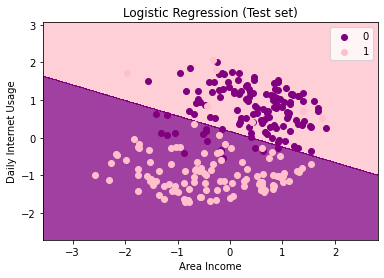

In [75]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('Pink', 'Purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('Purple', 'Pink'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Area Income')
plt.ylabel('Daily Internet Usage')
plt.legend()
plt.show()